# Agent shift schedule - data analysis


### Data load

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data into a Pandas DataFrame
data = pd.read_csv('Agent_Shifts_Structured.csv')

In [3]:
# Explore the data
print(data.head())  # Print the first few rows
print(data.shape)   # Print the number of rows and columns
print(data.dtypes)  # Print the data types of each column
print(data.isnull().sum()) # Check for missing values

         Date Weekday    Person Shift Start Time Shift End Time  Activity  \
0  2024-02-26  Monday  Person 1         15:30:00       00:00:00  On Queue   
1  2024-02-26  Monday  Person 1         15:30:00       00:00:00     Break   
2  2024-02-26  Monday  Person 1         15:30:00       00:00:00  On Queue   
3  2024-02-26  Monday  Person 1         15:30:00       00:00:00      Meal   
4  2024-02-26  Monday  Person 1         15:30:00       00:00:00  On Queue   

  Activity Start Time Activity End Time Day Off  
0            15:30:00          17:15:00     NaN  
1            17:15:00          17:30:00     NaN  
2            17:30:00          20:00:00     NaN  
3            20:00:00          20:30:00     NaN  
4            20:30:00          22:15:00     NaN  
(7004, 9)
Date                   object
Weekday                object
Person                 object
Shift Start Time       object
Shift End Time         object
Activity               object
Activity Start Time    object
Activity End Time

### Data cleaning and preprocessing

In [4]:
# Data cleaning and preprocessing

data['Person'] = data['Person'].astype(str).str.split().str[-1].astype(int)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column 'Next Day' to handle '00:00:00' case
data['Next Day'] = data['Date'] + pd.Timedelta(days=1)

# Function to handle '00:00:00' cases and convert to datetime
def convert_time_columns(df, start_col, end_col):
    # Convert start and end times to datetime
    df[start_col] = pd.to_datetime(df['Date'].astype(str) + ' ' + df[start_col], errors='coerce')
    df[end_col] = pd.to_datetime(df['Date'].astype(str) + ' ' + df[end_col], errors='coerce')

    # Check if end time is less than start time, adjust to next day
    mask = df[end_col] < df[start_col]
    df.loc[mask, end_col] = pd.to_datetime(df['Next Day'].astype(str) + ' ' + df[end_col].dt.time.astype(str), errors='coerce')
    return df

# Convert time columns to datetime format and adjust end times if necessary
time_columns = [('Shift Start Time', 'Shift End Time'), 
                ('Activity Start Time', 'Activity End Time')]

for start_col, end_col in time_columns:
    data = convert_time_columns(data, start_col, end_col)

# Drop the 'Next Day' column
data.drop('Next Day', axis=1, inplace=True)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7004 entries, 0 to 7003
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 7004 non-null   datetime64[ns]
 1   Weekday              7004 non-null   object        
 2   Person               7004 non-null   int64         
 3   Shift Start Time     6932 non-null   datetime64[ns]
 4   Shift End Time       6932 non-null   datetime64[ns]
 5   Activity             6932 non-null   object        
 6   Activity Start Time  6932 non-null   datetime64[ns]
 7   Activity End Time    6932 non-null   datetime64[ns]
 8   Day Off              72 non-null     object        
dtypes: datetime64[ns](5), int64(1), object(3)
memory usage: 492.6+ KB


In [6]:
data.head()

,Date,Weekday,Person,Shift Start Time,Shift End Time,Activity,Activity Start Time,Activity End Time,Day Off
0,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,On Queue,2024-02-26 15:30:00,2024-02-26 17:15:00,NaN
1,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,Break,2024-02-26 17:15:00,2024-02-26 17:30:00,NaN
2,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,On Queue,2024-02-26 17:30:00,2024-02-26 20:00:00,NaN
3,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,Meal,2024-02-26 20:00:00,2024-02-26 20:30:00,NaN
4,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,On Queue,2024-02-26 20:30:00,2024-02-26 22:15:00,NaN


### Exploratory Data Analysis (EDA)

In [7]:
# Exploratory Data Analysis (EDA)

# Calculate shift duration
data['Shift Duration'] = (data['Shift End Time'] - data['Shift Start Time']).dt.total_seconds() / 3600

# Calculate activity duration
data['Activity Duration'] = (data['Activity End Time'] - data['Activity Start Time']).dt.total_seconds() / 3600

In [8]:
data.head(15)

,Date,Weekday,Person,Shift Start Time,Shift End Time,Activity,Activity Start Time,Activity End Time,Day Off,Shift Duration,Activity Duration
0,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,On Queue,2024-02-26 15:30:00,2024-02-26 17:15:00,NaN,8.5,1.75
1,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,Break,2024-02-26 17:15:00,2024-02-26 17:30:00,NaN,8.5,0.25
2,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,On Queue,2024-02-26 17:30:00,2024-02-26 20:00:00,NaN,8.5,2.50
3,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,Meal,2024-02-26 20:00:00,2024-02-26 20:30:00,NaN,8.5,0.50
4,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,On Queue,2024-02-26 20:30:00,2024-02-26 22:15:00,NaN,8.5,1.75
5,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,Break,2024-02-26 22:15:00,2024-02-26 22:30:00,NaN,8.5,0.25
6,2024-02-26,Monday,1,2024-02-26 15:30:00,2024-02-27,On Queue,2024-02-26 22:30:00,2024-02-27 00:00:00,NaN,8.5,1.50
7,2024-02-27,Tuesday,1,2024-02-27 15:30:00,2024-02-28,On Queue,2024-02-27 15:30:00,2024-02-27 17:15:00,NaN,8.5,1.75
8,2024-02-27,Tuesday,1,2024-02-27 15:30:00,2024-02-28,Break,2024-02-27 17:15:00,2024-02-27 17:30:00,NaN,8.5,0.25
9,2024-02-27,Tuesday,1,2024-02-27 15:30:00,2024-02-28,On Queue,2024-02-27 17:30:00,2024-02-27 20:00:00,NaN,8.5,2.50


In [9]:
# Group data by person, date and activity to get total durations
person_activity_durations = data.groupby(['Person', 'Activity'])['Activity Duration'].sum()
# Sort the grouped data by 'Person' column
person_activity_durations = person_activity_durations.sort_index()
print(person_activity_durations)

Person  Activity        
1       Break                10.5
        Extra Hours           7.5
        Meal                 10.5
        Meeting               0.5
        On Queue            149.5
                            ...  
59      Meal                  8.0
        Meeting               0.5
        On Queue             90.5
        Program Training     28.5
        Time Off              0.5
Name: Activity Duration, Length: 293, dtype: float64


In [10]:
# Save the grouped data to a readable report
person_activity_durations.to_csv('person_activity_durations_report.csv')
print("Grouped data by person and activity saved to 'person_activity_durations_report.csv'")

Grouped data by person and activity saved to 'person_activity_durations_report.csv'


In [11]:
# Group data by person and activity to get total durations
person_activity_durations_per_date = data.groupby(['Person', 'Date', 'Activity'])['Activity Duration'].sum()
# Sort the grouped data by 'Person' column
person_activity_durations_per_date = person_activity_durations_per_date.sort_index()
print(person_activity_durations_per_date)

Person  Date        Activity
1       2024-02-26  Break       0.5
                    Meal        0.5
                    On Queue    7.5
        2024-02-27  Break       0.5
                    Meal        0.5
                               ... 
59      2024-03-22  Meal        0.5
                    On Queue    7.5
        2024-03-23  Break       0.5
                    Meal        0.5
                    On Queue    7.5
Name: Activity Duration, Length: 3115, dtype: float64


In [12]:
# Save the grouped data to a readable report
person_activity_durations_per_date.to_csv('person_activity_durations_per_date_report.csv')
print("Grouped data by person and activity saved to 'person_activity_durations_per_date_report.csv'")

Grouped data by person and activity saved to 'person_activity_durations_per_date_report.csv'


In [13]:
# day off counts
print('Total count:', data['Day Off'].value_counts().sum())
print(data['Day Off'].value_counts())

Total count: 72
Day Off
full day off - Absent      41
full day off - Time Off    20
full day off - Leave       11
Name: count, dtype: int64


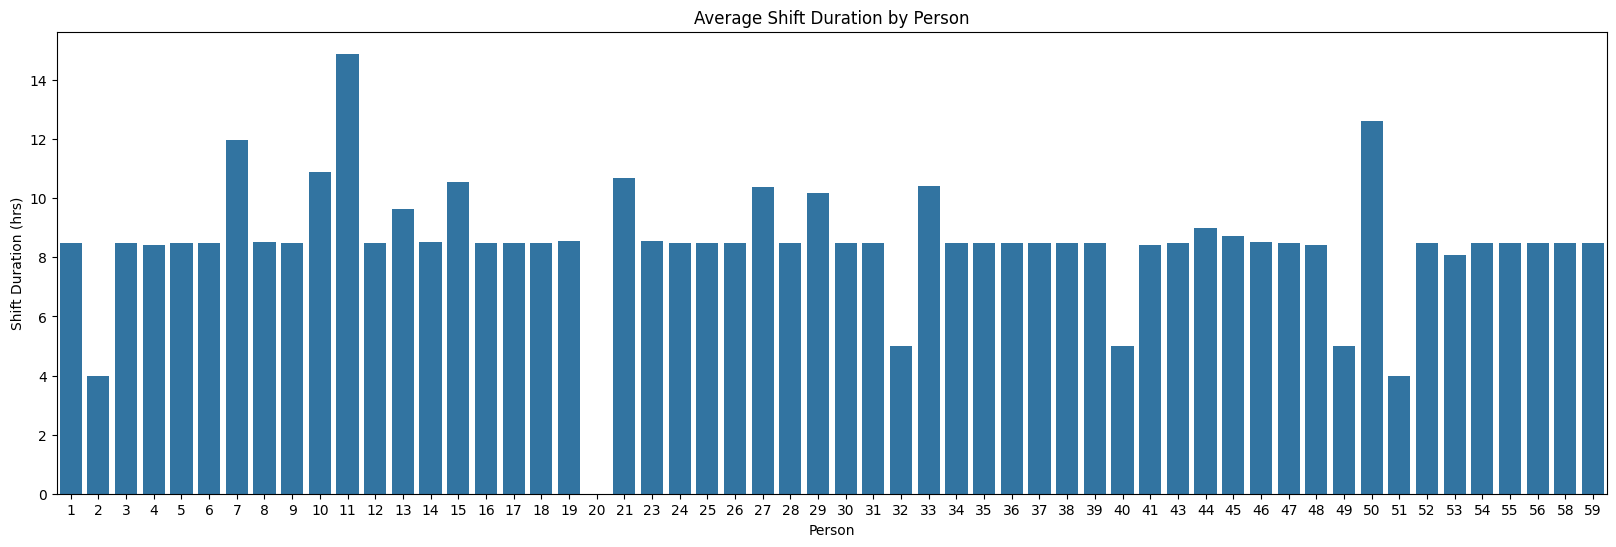

In [14]:
# Step 6: Data Visualization
# Plot shift durations by person
plt.figure(figsize=(20, 6))
sns.barplot(x='Person', y='Shift Duration', data=data.groupby('Person')['Shift Duration'].mean().reset_index())
plt.title('Average Shift Duration by Person')
plt.xlabel('Person')
plt.ylabel('Shift Duration (hrs)')
plt.show()

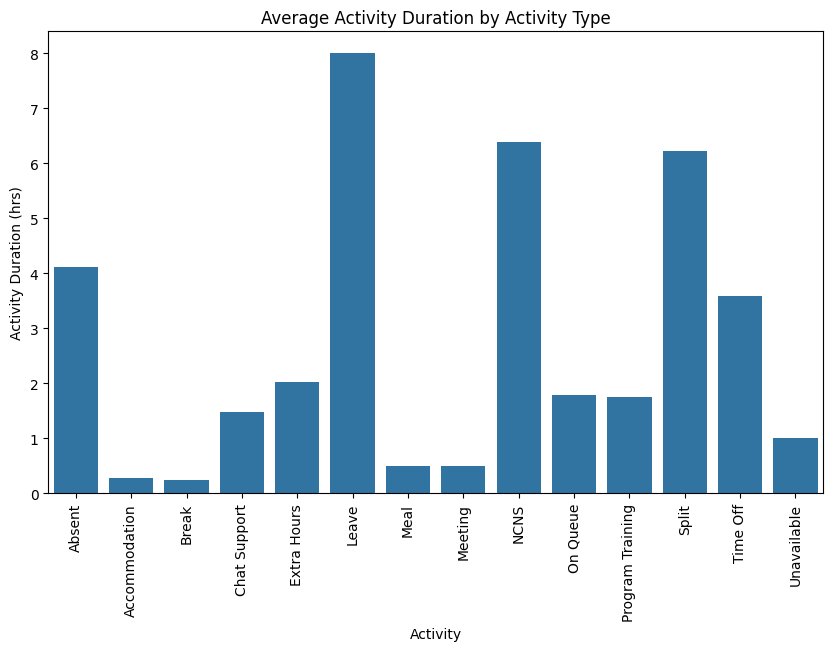

In [15]:
# Plot activity durations by person
plt.figure(figsize=(10, 6))
sns.barplot(x='Activity', y='Activity Duration', data=data.groupby('Activity')['Activity Duration'].mean().reset_index())
plt.title('Average Activity Duration by Activity Type')
plt.xlabel('Activity')
plt.xticks(rotation=90)
plt.ylabel('Activity Duration (hrs)')
plt.show()

### Business questions

1. How many people had breaks at 10:30 AM on 3/8/2024?

In [16]:
# Filter the data for the specific date and time
specific_datetime = pd.Timestamp('2024-03-08 10:30:00')
breaks_at_specific_time = data[
    (data['Activity'] == 'Break') &
    (data['Activity Start Time'] <= specific_datetime) &
    (data['Activity End Time'] >= specific_datetime)
]

# Get the unique people who had breaks at that time
unique_people = breaks_at_specific_time['Person'].nunique()

print(f"Number of people who had breaks at 10:30 AM on 3/8/2024: {unique_people}")


Number of people who had breaks at 10:30 AM on 3/8/2024: 5


In [17]:
breaks_at_specific_time

,Date,Weekday,Person,Shift Start Time,Shift End Time,Activity,Activity Start Time,Activity End Time,Day Off,Shift Duration,Activity Duration
907,2024-03-08,Friday,8,2024-03-08 08:00:00,2024-03-08 16:30:00,Break,2024-03-08 10:30:00,2024-03-08 10:45:00,NaN,8.5,0.25
3327,2024-03-08,Friday,27,2024-03-08 08:00:00,2024-03-08 18:30:00,Break,2024-03-08 10:30:00,2024-03-08 10:45:00,NaN,10.5,0.25
5292,2024-03-08,Friday,44,2024-03-08 08:00:00,2024-03-08 12:00:00,Break,2024-03-08 10:15:00,2024-03-08 10:30:00,NaN,4.0,0.25
5601,2024-03-08,Friday,46,2024-03-08 08:30:00,2024-03-08 17:00:00,Break,2024-03-08 10:15:00,2024-03-08 10:30:00,NaN,8.5,0.25
6542,2024-03-08,Friday,55,2024-03-08 09:00:00,2024-03-08 17:30:00,Break,2024-03-08 10:30:00,2024-03-08 10:45:00,NaN,8.5,0.25


2. How much time did person 15 spend in Meals during the entire period in this dataset?

In [18]:
# Filter the DataFrame for person 15 and activity 'Meal'
person_15_meals = data[(data['Person'] == 15) & (data['Activity'] == 'Meal')]

# Sum the 'Activity Duration' for these entries
total_meal_duration = person_15_meals['Activity Duration'].sum()

print(f"Total time person 15 spent in meals: {total_meal_duration} hours")

Total time person 15 spent in meals: 8.0 hours


In [19]:
person_15_meals

,Date,Weekday,Person,Shift Start Time,Shift End Time,Activity,Activity Start Time,Activity End Time,Day Off,Shift Duration,Activity Duration
1861,2024-02-29,Thursday,15,2024-02-29,2024-02-29 10:30:00,Meal,2024-02-29 03:30:00,2024-02-29 04:00:00,NaN,10.5,0.5
1870,2024-03-01,Friday,15,2024-03-01,2024-03-01 10:30:00,Meal,2024-03-01 03:30:00,2024-03-01 04:00:00,NaN,10.5,0.5
1879,2024-03-02,Saturday,15,2024-03-02,2024-03-02 10:30:00,Meal,2024-03-02 03:30:00,2024-03-02 04:00:00,NaN,10.5,0.5
1888,2024-03-03,Sunday,15,2024-03-03,2024-03-03 10:30:00,Meal,2024-03-03 03:30:00,2024-03-03 04:00:00,NaN,10.5,0.5
1897,2024-03-07,Thursday,15,2024-03-07,2024-03-07 10:30:00,Meal,2024-03-07 03:30:00,2024-03-07 04:00:00,NaN,10.5,0.5
1906,2024-03-08,Friday,15,2024-03-08,2024-03-08 10:30:00,Meal,2024-03-08 03:30:00,2024-03-08 04:00:00,NaN,10.5,0.5
1915,2024-03-09,Saturday,15,2024-03-09,2024-03-09 10:30:00,Meal,2024-03-09 03:30:00,2024-03-09 04:00:00,NaN,10.5,0.5
1924,2024-03-10,Sunday,15,2024-03-10,2024-03-10 11:30:00,Meal,2024-03-10 04:30:00,2024-03-10 05:00:00,NaN,11.5,0.5
1933,2024-03-14,Thursday,15,2024-03-14,2024-03-14 10:30:00,Meal,2024-03-14 03:30:00,2024-03-14 04:00:00,NaN,10.5,0.5
1942,2024-03-15,Friday,15,2024-03-15,2024-03-15 10:30:00,Meal,2024-03-15 03:30:00,2024-03-15 04:00:00,NaN,10.5,0.5


3. How much total time was scheduled on 3/10/2024?

In [20]:
# Filter the DataFrame for the date 3/10/2024
date_filter = data['Date'] == '2024-03-10'
filtered_data = data[date_filter]

# Drop duplicate rows based on the 'Person' column, keeping only the first occurrence
filtered_data = filtered_data.drop_duplicates(subset='Person', keep='first')

# Sum the 'Shift Duration' for these entries
total_shift_duration = filtered_data['Shift Duration'].sum()

print(f"Total scheduled time on 3/10/2024: {total_shift_duration} hours")



Total scheduled time on 3/10/2024: 92.5 hours


In [21]:
filtered_data.drop_duplicates(subset='Person', keep='first')

,Date,Weekday,Person,Shift Start Time,Shift End Time,Activity,Activity Start Time,Activity End Time,Day Off,Shift Duration,Activity Duration
635,2024-03-10,Sunday,6,2024-03-10 14:30:00,2024-03-10 23:00:00,On Queue,2024-03-10 14:30:00,2024-03-10 16:00:00,NaN,8.5,1.50
1339,2024-03-10,Sunday,11,2024-03-10 07:00:00,2024-03-10 23:00:00,On Queue,2024-03-10 07:00:00,2024-03-10 08:30:00,NaN,16.0,1.50
1662,2024-03-10,Sunday,13,2024-03-10 23:00:00,2024-03-11 07:30:00,On Queue,2024-03-10 23:00:00,2024-03-11 01:30:00,NaN,8.5,2.50
1921,2024-03-10,Sunday,15,2024-03-10 00:00:00,2024-03-10 11:30:00,On Queue,2024-03-10 00:00:00,2024-03-10 01:30:00,NaN,11.5,1.50
2478,2024-03-10,Sunday,19,2024-03-10 22:30:00,2024-03-11 07:00:00,On Queue,2024-03-10 22:30:00,2024-03-11 00:00:00,NaN,8.5,1.50
2632,2024-03-10,Sunday,21,2024-03-10 06:00:00,2024-03-10 18:00:00,On Queue,2024-03-10 06:00:00,2024-03-10 08:15:00,NaN,12.0,2.25
3664,2024-03-10,Sunday,30,2024-03-10 10:00:00,2024-03-10 18:30:00,On Queue,2024-03-10 10:00:00,2024-03-10 11:30:00,NaN,8.5,1.50
3989,2024-03-10,Sunday,33,2024-03-10 21:30:00,2024-03-11 08:00:00,On Queue,2024-03-10 21:30:00,2024-03-10 23:30:00,NaN,10.5,2.00
6014,2024-03-10,Sunday,50,2024-03-10 07:30:00,2024-03-10 16:00:00,On Queue,2024-03-10 07:30:00,2024-03-10 09:00:00,NaN,8.5,1.50
